In [1]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which p arts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

import pandas as pd

from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

from IPython.display import clear_output

import numpy as np

from PIL import ImageFont
from PIL import Image, ImageDraw
from PIL import ImageColor

from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

import random

import time
import shutil
import uuid
from shutil import copyfile
from collections import Counter

import json

from scipy.ndimage.filters import gaussian_filter1d
from matplotlib.pyplot import figure

In [2]:
def read_all(paths):
    lines=[]
    for path in paths:
#         print( 'reading ', path)
        with open(path) as f:
            newlines = f.readlines()
#             print( path, len(newlines))
#             epochs.append( (len(newlines), path, newlines))
            lines.extend( newlines)
    return lines

In [3]:
def collect_for( _len):
    tag = '' if _len == 16 else '-len{}'.format( _len)
    print( 'tag=', tag)

    def fname2qtd( _len, fname):
#         print( fname)
        return fname.\
            replace('train_icpr2022_reply_reference{}_'.format( tag), '').\
            replace( '---8linhas-handwritten--5k.txt', '')

    def collect( f):
        lines = read_all([f])
        logs = [json.loads( line) for line in lines]

        r = {
            'train_loss': [log['train_loss'] for log in logs],
            'valid_loss': [log['valid_loss'] for log in logs],
            'train_acc': [log['train_acc'] for log in logs],
            'valid_acc': [log['valid_acc'] for log in logs],
            'test_acc': [log['test_acc'][0][0][-1] for log in logs],
            'test_acc0': [log['test_acc'][0][0][0] for log in logs],
        }
        return r

    logs = []
    files = glob( os.path.join( 
        'C:/mestrado/repos-github/chess-attention/train-folder/log', 
        'train_icpr2022_reply_reference{}_*.txt').format( tag))
    print( len( files))
    for f in files:
        logs.append( (fname2qtd( _len, Path( f).name), collect( f), f))
    logs = sorted( logs, key=lambda x: int( x[0]))
    for _, _, f in logs:
        print( f)
    return logs

logs_all={}
for _len in [16, 12, 8, 4]:
    print( _len)
    logs_all[_len] = collect_for( _len)
logs = logs_all[16]

16
tag= 
12
C:/mestrado/repos-github/chess-attention/train-folder/log\train_icpr2022_reply_reference_50---8linhas-handwritten--5k.txt
C:/mestrado/repos-github/chess-attention/train-folder/log\train_icpr2022_reply_reference_200---8linhas-handwritten--5k.txt
C:/mestrado/repos-github/chess-attention/train-folder/log\train_icpr2022_reply_reference_500---8linhas-handwritten--5k.txt
C:/mestrado/repos-github/chess-attention/train-folder/log\train_icpr2022_reply_reference_1000---8linhas-handwritten--5k.txt
C:/mestrado/repos-github/chess-attention/train-folder/log\train_icpr2022_reply_reference_1500---8linhas-handwritten--5k.txt
C:/mestrado/repos-github/chess-attention/train-folder/log\train_icpr2022_reply_reference_2000---8linhas-handwritten--5k.txt
C:/mestrado/repos-github/chess-attention/train-folder/log\train_icpr2022_reply_reference_2500---8linhas-handwritten--5k.txt
C:/mestrado/repos-github/chess-attention/train-folder/log\train_icpr2022_reply_reference_3000---8linhas-handwritten--5k.txt


In [4]:
for x in logs:
    print( x[0])
xr = [x[0] for x in logs]
# xr.reverse()
print( '['+','.join( xr)+']')

50
200
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
[50,200,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]


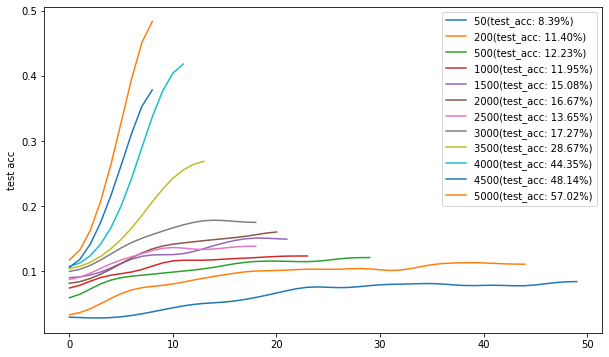

In [5]:
figure(figsize=(10, 6))
legends = []
for qtd, log, _ in logs:
    plt.plot( gaussian_filter1d(log['test_acc'], sigma=2))
    legends.append( "{}(test_acc: {:.2f}%)".format( qtd, log['test_acc'][-1]*100))
plt.ylabel( 'test acc')
plt.gca().legend( legends)
plt.show()

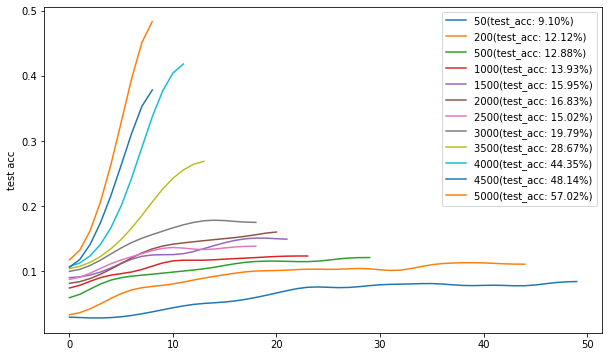

In [6]:
figure(figsize=(10, 6))
legends = []
for qtd, log, _ in logs:
    plt.plot( gaussian_filter1d(log['test_acc'], sigma=2))
    legends.append( "{}(test_acc: {:.2f}%)".format( qtd, max( log['test_acc'])*100))
plt.ylabel( 'test acc')
plt.gca().legend( legends)
plt.show()

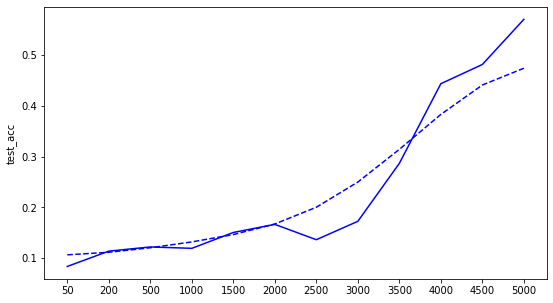

In [7]:
figure(figsize=(9, 5))
test_acc = [log['test_acc'][-1] for (qtd, log, _) in logs]
qtd = [qtd for (qtd, log, _) in logs]
# test_acc.reverse()
# qtd.reverse()

plt.plot(qtd, gaussian_filter1d(test_acc, sigma=2), '--', color='blue')
plt.plot(qtd, test_acc,color='blue')

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('test_acc')
# plt.gca().legend(
#     ('test_acc')
# )
plt.show()


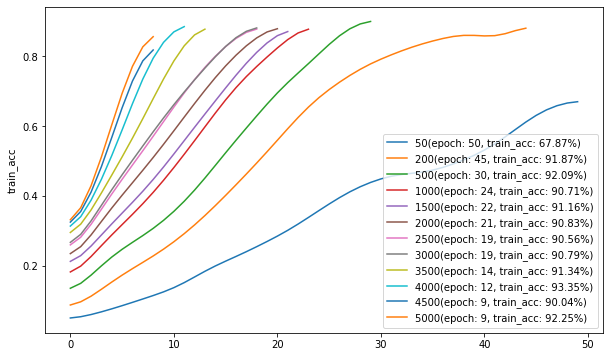

In [8]:
figure(figsize=(10, 6))
legends = []
for qtd, log, _ in logs:
    plt.plot( gaussian_filter1d(log['train_acc'], sigma=2))
    legends.append( "{}(epoch: {}, train_acc: {:.2f}%)".format( qtd, len( log['train_acc']),log['train_acc'][-1]*100))
plt.ylabel( 'train_acc')
plt.gca().legend( legends)
plt.show()

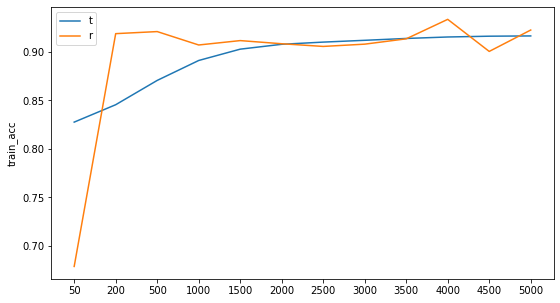

In [9]:
figure(figsize=(9, 5))
train_acc = [log['train_acc'][-1] for (qtd, log, _) in logs]
qtd = [qtd for (qtd, log, _) in logs]
# train_acc.reverse()
# qtd.reverse()

plt.plot(qtd, gaussian_filter1d(train_acc, sigma=2))
plt.plot(qtd, train_acc)

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('train_acc')
plt.gca().legend(
    ('train_acc')
)
plt.show()

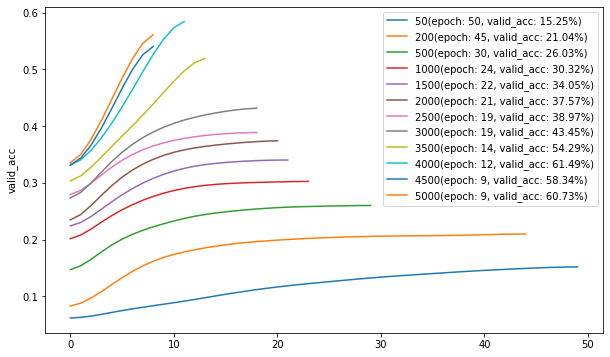

In [10]:
figure(figsize=(10, 6))
legends = []
for qtd, log, _ in logs:
    plt.plot( gaussian_filter1d(log['valid_acc'], sigma=2))
    legends.append( "{}(epoch: {}, valid_acc: {:.2f}%)".format( qtd, len( log['valid_acc']),log['valid_acc'][-1]*100))
plt.ylabel( 'valid_acc')
plt.gca().legend( legends)
plt.show()

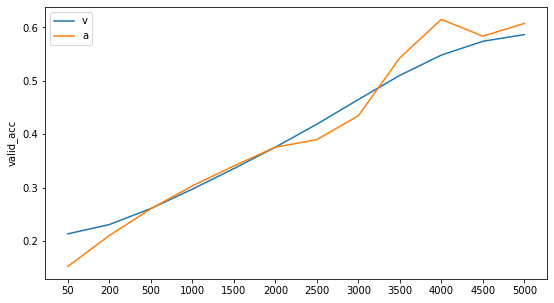

In [11]:
figure(figsize=(9, 5))
valid_acc = [log['valid_acc'][-1] for (qtd, log, _) in logs]
qtd = [qtd for (qtd, log, _) in logs]
# valid_acc.reverse()
# qtd.reverse()

plt.plot(qtd, gaussian_filter1d(valid_acc, sigma=2))
plt.plot(qtd, valid_acc)

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('valid_acc')
plt.gca().legend(
    ('valid_acc')
)
plt.show()

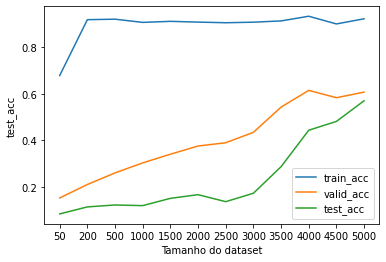

In [12]:
# figure(figsize=(12, 8))
qtd = [qtd for (qtd, log, _) in logs]
# qtd.reverse()

plt.plot(qtd, train_acc )
plt.plot(qtd, valid_acc)
plt.plot(qtd, test_acc)
# plt.plot(qtd, gaussian_filter1d(train_acc, sigma=2), '--')
# plt.plot(qtd, gaussian_filter1d(valid_acc, sigma=2), '--')
# plt.plot(qtd, gaussian_filter1d(test_acc, sigma=2), '--')

plt.xlabel('Tamanho do dataset')
plt.ylabel('test_acc')
plt.gca().legend(
    ['train_acc', 'valid_acc', 'test_acc']
)
plt.show()


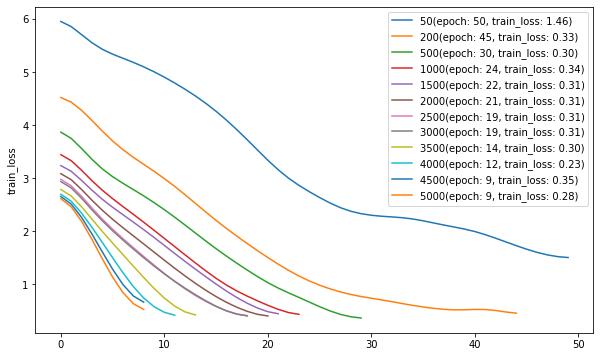

In [13]:
figure(figsize=(10, 6))
legends = []
for qtd, log, _ in logs:
    plt.plot( gaussian_filter1d(log['train_loss'], sigma=2))
    legends.append( "{}(epoch: {}, train_loss: {:.2f})".format( qtd, len( log['train_loss']),log['train_loss'][-1]))
plt.ylabel( 'train_loss')
plt.gca().legend( legends)
plt.show()

In [14]:
def normalize( arr, mmin= None, mmax=None):
    def norm( x, mmin, mmax):
        return (x - mmin) / (mmax - mmin)
    mmin = min( arr) if mmin is None else mmin
    mmax = max( arr) if mmax is None else mmax
    r= [norm(x, mmin, mmax) for x in arr]
    return r

In [15]:
test_acc

[0.08388157933950424,
 0.11403508484363556,
 0.12225877493619919,
 0.11951754242181778,
 0.15076754987239838,
 0.1666666716337204,
 0.13651315867900848,
 0.17269736528396606,
 0.2867324650287628,
 0.44353070855140686,
 0.48135966062545776,
 0.5701754093170166]

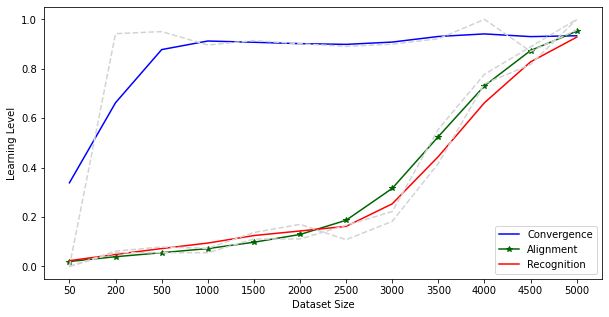

In [16]:
figure(figsize=(10, 5))
qtd = [qtd for (qtd, log, _) in logs]
# qtd.reverse()

alinhamento = [1, 1.5, 1.5, 1.5, 2, 2, 2.5, 3, 6, 8, 9, 10]

# plt.plot(qtd, normalize( train_acc) )
# plt.plot(qtd, normalize(test_acc))
plt.plot(qtd, gaussian_filter1d(normalize( train_acc), sigma=1.0), color='blue')
plt.plot(qtd, gaussian_filter1d(normalize( alinhamento), sigma=1.0), '*-', color='darkgreen')
plt.plot(qtd, gaussian_filter1d(normalize(test_acc), sigma=1.0), color='red')

plt.plot(qtd, normalize( train_acc), '--', color='lightgray')
plt.plot(qtd, normalize( alinhamento), '--', color='lightgray')
plt.plot(qtd, normalize(test_acc), '--', color='lightgray')

plt.xlabel('Dataset Size')
plt.ylabel('Learning Level')
plt.gca().legend(
    ['Convergence', 'Alignment', 'Recognition']
)
plt.show()

In [17]:
test_acc

[0.08388157933950424,
 0.11403508484363556,
 0.12225877493619919,
 0.11951754242181778,
 0.15076754987239838,
 0.1666666716337204,
 0.13651315867900848,
 0.17269736528396606,
 0.2867324650287628,
 0.44353070855140686,
 0.48135966062545776,
 0.5701754093170166]

In [18]:
qtd = [qtd for (qtd, log, _) in logs]
qtd

['50',
 '200',
 '500',
 '1000',
 '1500',
 '2000',
 '2500',
 '3000',
 '3500',
 '4000',
 '4500',
 '5000']

In [19]:
# logs_all[16][0][1]['test_acc']
#logs_all[16]   # lista para cada um dos tamanhos
i = 0
_len = 16
_logs = 1
_tam = 0
#max( logs_all[_len][_tam][1]['train_loss'])   # pega o primeiro tamanho. substitu
# print( logs_all[_len][0])
# for _t in logs_all[_len]:
#     _tam = _t[0]
#     print( _t)
#     break
_attr = 'test_acc'
values = []
for _len in logs_all:   #chaves
    values.append( [max( tpl_tam[1][_attr]) for tpl_tam in logs_all[_len]])
#     for tpl_tam in logs_all[_len]:
#         _tam = tpl_tam[0]
#         print( _len, _tam, _attr, max( tpl_tam[1][_attr]))
#     break
print( values)

[[0.09100877493619919, 0.1211622804403305, 0.1288377195596695, 0.1392543911933899, 0.15953947603702545, 0.16831140220165253, 0.15021929144859314, 0.1979166716337204, 0.2867324650287628, 0.44353070855140686, 0.48135966062545776, 0.5701754093170166], [0.1396198868751526, 0.1535087674856186, 0.1659356653690338, 0.17836257815361023, 0.19809941947460175, 0.20248538255691528, 0.20540936291217804, 0.24561403691768646, 0.30190059542655945, 0.2704678475856781, 0.46783626079559326, 0.5080409646034241], [0.2225877195596695, 0.22478070855140686, 0.2149122804403305, 0.26864033937454224, 0.27521929144859314, 0.28837719559669495, 0.36513158679008484, 0.3739035129547119, 0.46929824352264404, 0.5614035129547119, 0.625, 0.6414473652839661], [0.28070175647735596, 0.33114033937454224, 0.3618420958518982, 0.34210526943206787, 0.37061402201652527, 0.4429824650287628, 0.5482456088066101, 0.5043859481811523, 0.6118420958518982, 0.6228070259094238, 0.6754385828971863, 0.6929824352264404]]


In [20]:
def plot_normalized( _attr, colors):
    values = []
    for _len in logs_all:   #chaves
        values.append( [max( tpl_tam[1][_attr]) for tpl_tam in logs_all[_len]])
    
    mmin = min( [min(v) for v in values])
    mmax = max( [max(v) for v in values])

    for i in range( 0, len( values)):
        print( len( values[i]), values[i])

plot_normalized( 'test_acc', None)

12 [0.09100877493619919, 0.1211622804403305, 0.1288377195596695, 0.1392543911933899, 0.15953947603702545, 0.16831140220165253, 0.15021929144859314, 0.1979166716337204, 0.2867324650287628, 0.44353070855140686, 0.48135966062545776, 0.5701754093170166]
12 [0.1396198868751526, 0.1535087674856186, 0.1659356653690338, 0.17836257815361023, 0.19809941947460175, 0.20248538255691528, 0.20540936291217804, 0.24561403691768646, 0.30190059542655945, 0.2704678475856781, 0.46783626079559326, 0.5080409646034241]
12 [0.2225877195596695, 0.22478070855140686, 0.2149122804403305, 0.26864033937454224, 0.27521929144859314, 0.28837719559669495, 0.36513158679008484, 0.3739035129547119, 0.46929824352264404, 0.5614035129547119, 0.625, 0.6414473652839661]
12 [0.28070175647735596, 0.33114033937454224, 0.3618420958518982, 0.34210526943206787, 0.37061402201652527, 0.4429824650287628, 0.5482456088066101, 0.5043859481811523, 0.6118420958518982, 0.6228070259094238, 0.6754385828971863, 0.6929824352264404]


In [21]:
len( qtd)

12

In [22]:
lens = [_ for _ in logs_all]

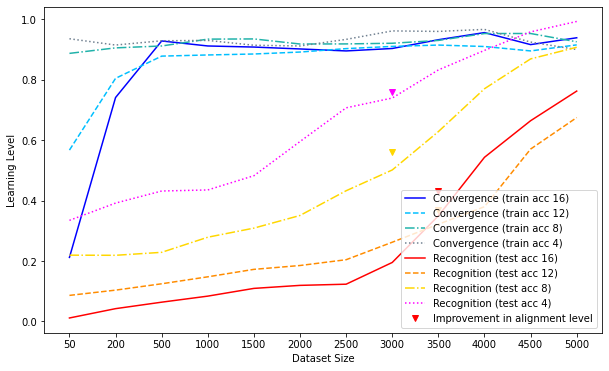

In [23]:
qtd = [qtd for (qtd, log, _) in logs]


data= []

def plot_normalized( _attr, colors, pat):
    values = []
    for _len in logs_all:   #chaves
        values.append( [max( tpl_tam[1][_attr]) for tpl_tam in logs_all[_len]])
    
    mmin = min( [min(v) for v in values])
    mmax = max( [max(v) for v in values])

    for i in range( 0, len( values)):
        plt.plot(qtd, gaussian_filter1d(
                normalize( values[i], mmin, mmax), sigma=0.7), pat[i], color=colors[i])

        data.append( values[i])
        
    
figure(figsize=(10, 6))
legends = []

plot_normalized( 'train_acc', ['b', 'deepskyblue', 'lightseagreen', 'slategray'],
               ['-', '--', '-.', ':'])
for _l in lens:
    legends.append( 'Convergence (train acc '+ str(_l)+')')


plot_normalized( 'test_acc', ['red', 'darkorange', 'gold', 'magenta'],
               ['-', '--', '-.', ':'])
for _l in lens:
    legends.append( 'Recognition (test acc '+ str(_l)+')')

plt.plot( 8, 0.43, 'v', color='red')  # 16 4000
plt.plot( 8, 0.37, 'v', color='darkorange') # 8 4500
plt.plot( 7, 0.56, 'v', color='gold') # 8 4000
plt.plot( 7, 0.76, 'v', color='magenta') # 8 4000
legends.append( 'Improvement in alignment level')
    
    
# plt.plot(qtd, normalize(test_acc), '--', color='lightgray')

plt.xlabel('Dataset Size')
plt.ylabel('Learning Level')
plt.gca().legend(
    legends
#     ['Convergence', 'Alignment', 'Recognition']
)
plt.show()

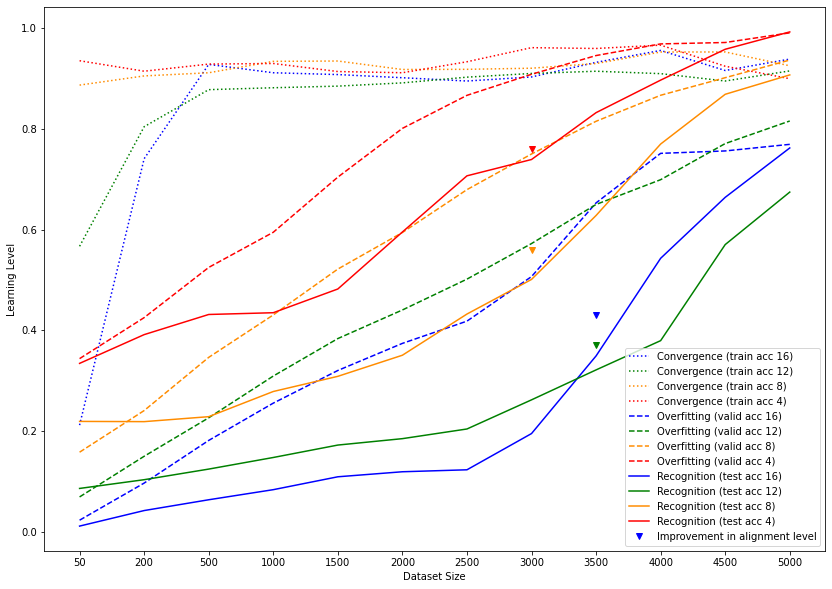

In [37]:
qtd = [qtd for (qtd, log, _) in logs]


data= []

def plot_normalized( _attr, colors, pat):
    values = []
    for _len in logs_all:   #chaves
        values.append( [max( tpl_tam[1][_attr]) for tpl_tam in logs_all[_len]])
    
    mmin = min( [min(v) for v in values])
    mmax = max( [max(v) for v in values])

    for i in range( 0, len( values)):
        plt.plot(qtd, gaussian_filter1d(
                normalize( values[i], mmin, mmax), sigma=0.7), pat[i], color=colors[i])

        data.append( values[i])
        
    
figure(figsize=(14, 10))
legends = []

# train acc
plot_normalized( 'train_acc', ['b', 'g', 'darkorange', 'red'],
               [':', ':', ':', ':'])
for _l in lens:
    legends.append( 'Convergence (train acc '+ str(_l)+')')


# valid acc
plot_normalized( 'valid_acc', ['b', 'g', 'darkorange', 'red'],
               ['--', '--', '--', '--'])
for _l in lens:
    legends.append( 'Overfitting (valid acc '+ str(_l)+')')
    
    
# test acc
plot_normalized( 'test_acc', ['b', 'g', 'darkorange', 'red'],
               ['-', '-', '-', '-'])
for _l in lens:
    legends.append( 'Recognition (test acc '+ str(_l)+')')

    
    
plt.plot( 8, 0.43, 'v', color='b')  # 16 4000
plt.plot( 8, 0.37, 'v', color='g') # 8 4500
plt.plot( 7, 0.56, 'v', color='darkorange') # 8 4000
plt.plot( 7, 0.76, 'v', color='red') # 8 4000
legends.append( 'Improvement in alignment level')
    
    
# plt.plot(qtd, normalize(test_acc), '--', color='lightgray')

plt.xlabel('Dataset Size')
plt.ylabel('Learning Level')
plt.gca().legend(
    legends
#     ['Convergence', 'Alignment', 'Recognition']
)
plt.show()

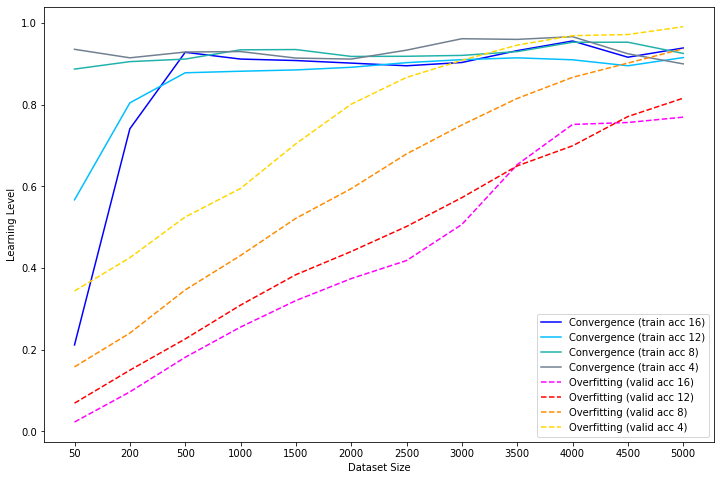

In [28]:
qtd = [qtd for (qtd, log, _) in logs]


data= []

def plot_normalized( _attr, colors, pat):
    values = []
    for _len in logs_all:   #chaves
        values.append( [max( tpl_tam[1][_attr]) for tpl_tam in logs_all[_len]])
    
    mmin = min( [min(v) for v in values])
    mmax = max( [max(v) for v in values])

    for i in range( 0, len( values)):
        plt.plot(qtd, gaussian_filter1d(
                normalize( values[i], mmin, mmax), sigma=0.7), pat[i], color=colors[i])

        data.append( values[i])
        
    
figure(figsize=(12, 8))
legends = []

# train acc
plot_normalized( 'train_acc', ['b', 'deepskyblue', 'lightseagreen', 'slategray'],
               ['-', '-', '-', '-'])
for _l in lens:
    legends.append( 'Convergence (train acc '+ str(_l)+')')


# valid acc
plot_normalized( 'valid_acc', ['magenta', 'red', 'darkorange', 'gold'],
               ['--', '--', '--', '--'])
for _l in lens:
    legends.append( 'Overfitting (valid acc '+ str(_l)+')')
    
    
# # test acc
# plot_normalized( 'test_acc', ['magenta', 'red', 'darkorange', 'gold'],
#                ['-', '-', '-', '-'])
# for _l in lens:
#     legends.append( 'Recognition (test acc '+ str(_l)+')')

    
    
# plt.plot( 8, 0.43, 'v', color='red')  # 16 4000
# plt.plot( 8, 0.37, 'v', color='darkorange') # 8 4500
# plt.plot( 7, 0.56, 'v', color='gold') # 8 4000
# plt.plot( 7, 0.76, 'v', color='magenta') # 8 4000
# legends.append( 'Improvement in alignment level')
    
    
# plt.plot(qtd, normalize(test_acc), '--', color='lightgray')

plt.xlabel('Dataset Size')
plt.ylabel('Learning Level')
plt.gca().legend(
    legends
#     ['Convergence', 'Alignment', 'Recognition']
)
plt.show()

In [38]:
data

[[0.6787499785423279,
  0.918749988079071,
  0.9208750128746033,
  0.9070624709129333,
  0.9115833044052124,
  0.9083437323570251,
  0.9055749773979187,
  0.9079166650772095,
  0.9134107232093811,
  0.9334843754768372,
  0.9004305601119995,
  0.9224874973297119],
 [0.7983333468437195,
  0.909166693687439,
  0.9011666774749756,
  0.9038333296775818,
  0.9038888812065125,
  0.9052083492279053,
  0.9093000292778015,
  0.9106666445732117,
  0.9117380976676941,
  0.9132708311080933,
  0.9013147950172424,
  0.9147833585739136],
 [0.9024999737739563,
  0.9125000238418579,
  0.9072499871253967,
  0.9196249842643738,
  0.918583333492279,
  0.9100000262260437,
  0.9134500026702881,
  0.9128749966621399,
  0.9136785864830017,
  0.9233750104904175,
  0.9246388673782349,
  0.9115250110626221],
 [0.9200000166893005,
  0.90625,
  0.9179999828338623,
  0.9169999957084656,
  0.9101666808128357,
  0.909500002861023,
  0.9146000146865845,
  0.9290000200271606,
  0.9179999828338623,
  0.932937502861023,
 